In [1]:
!python -m pip install astroquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.4/999.4 kB 24.1 MB/s eta 0:00:00


In [2]:
from astroquery.jplhorizons import Horizons # Access to the solar system dynamics database
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
# We define the planets with their stop dates
planetas = {
    "Mercury Barycenter": "2022-11-25",
    "Venus Barycenter": "2022-11-25",
    "Earth-Moon Barycenter": "2022-11-25",
    "Mars Barycenter": "2023-11-25",
    "Jupiter Barycenter": "2035-11-25",
    "Saturn Barycenter": "2051-11-25",
    "Uranus Barycenter": "2105-11-25",
    "Neptune Barycenter": "2200-11-25"
}

In [4]:
colores = {
    "Mercury Barycenter": "blue",
    "Venus Barycenter": "bisque",
    "Earth-Moon Barycenter": "green",
    "Mars Barycenter": "red",
    "Jupiter Barycenter": "peru",
    "Saturn Barycenter": "purple",
    "Uranus Barycenter": "yellow",
    "Neptune Barycenter": "cyan"
}


In [5]:
# We save the positions in a dictionary
posiciones = {}

for planeta, stop_date in planetas.items():
    obj = Horizons(id=planeta, location="@0", epochs={"start": "2021-11-25", "stop": stop_date, "step": "1d"})
    tabla = obj.vectors()
    x = tabla["x"].to("m").value
    y = tabla["y"].to("m").value
    z = tabla["z"].to("m").value
    posiciones[planeta] = (x, y, z)

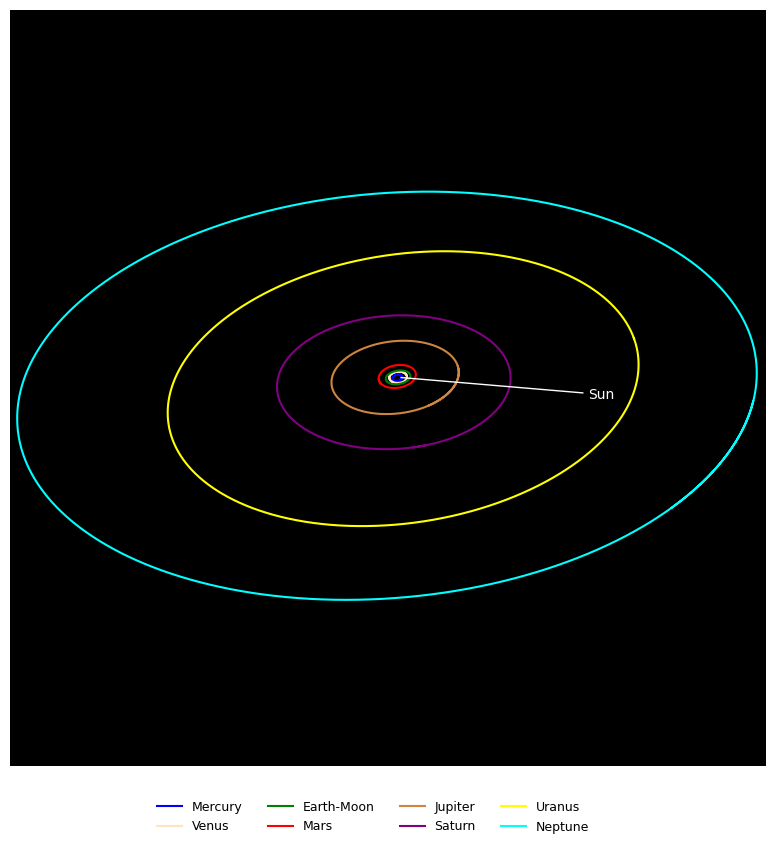

In [46]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')

for planeta, (x, y, z) in posiciones.items():
    ax.plot3D(x, y, z, color=colores[planeta], label=planeta.split()[0])

# Draw the Sun
T = np.zeros(3)
ax.plot3D(T, T, T, color="yellow")
ax.set(xlim=(-3.2e12, 3.2e12), ylim=(-2.5e12, 2.5e12), zlim=(-1e12, 1e12))
ax.set_facecolor('black')

ax.annotate('Sun', (0, 0), color="white",
            xytext=(0.8, 0.5), textcoords=('axes fraction'),
            arrowprops=dict(arrowstyle="-", color="white"),
            fontsize=10,
            horizontalalignment='right', verticalalignment='top')


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels,
           loc='upper center',
           bbox_to_anchor=(0.5, 0.23),
           ncol=4, fontsize=9, frameon=False)

plt.subplots_adjust(bottom=0.25)
plt.axis("off")
plt.show()